In [3]:
import os

In [4]:
os.chdir(r"C:\Users\anike\Downloads\JupyterFolder")
print("Changed directory ", os.getcwd())

Changed directory  C:\Users\anike\Downloads\JupyterFolder


In [5]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [6]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [7]:
len(os.listdir('COVID-19_Radiography_Dataset/Viral Pneumonia/images'))

1345

In [8]:
import cv2

In [9]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [10]:
import matplotlib.pyplot as plt

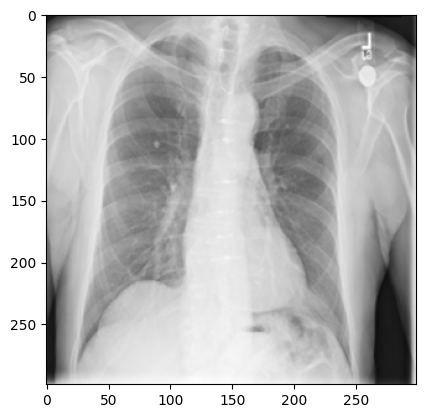

In [11]:
plt.imshow(img)

In [12]:
img.shape

(299, 299, 3)

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [15]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [16]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [17]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [18]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [19]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

In [20]:
# Function to load images and labels
def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = os.path.join(path, urls[i])
        img = load_and_preprocess_image(img_path, target_size=(100, 100))
        images.append(img)
        labels.append(target)
    return np.array(images), np.array(labels)

In [21]:
# def loadImages(path, urls, target):
#   images = []
#   labels = []
#   for i in range(len(urls)):
#     img_path = path + "/" + urls[i]
#     img = cv2.imread(img_path)
#     img = img / 255.0
#     #print(img_path)
#     # if we want to resize the images
#     img = cv2.resize(img, (100, 100))
#     images.append(img)
#     labels.append(target)
#   images = np.asarray(images)
#   return images, labels

In [22]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 0)

In [23]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [24]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 1)

In [25]:
len(normal_path), len(normal_urls)

(42, 10192)

In [26]:
pneumonia_path = "COVID-19_Radiography_Dataset/Viral Pneumonia/images"
pneumonia_urls = os.listdir(pneumonia_path)
pneumoniaImages, pneumoniaTargets = loadImages(pneumonia_path, pneumonia_urls, 2)

In [27]:
len(pneumonia_path), len(pneumonia_urls)

(51, 1345)

In [28]:
# covidImages = np.asarray(covidImages)
# normalImages = np.asarray(normalImages)
# pneumoniaImages = np.asarray(pneumoniaImages)

In [29]:
covidImages.shape

(3616, 100, 100, 3)

In [30]:
normalImages.shape

(10192, 100, 100, 3)

In [31]:
pneumoniaImages.shape

(1345, 100, 100, 3)

In [32]:
data = np.r_[covidImages, normalImages, pneumoniaImages]

In [33]:
data.shape

(15153, 100, 100, 3)

In [34]:
targets = np.r_[covidTargets, normalTargets , pneumoniaTargets]

In [35]:
targets.shape

(15153,)

In [36]:
data = np.concatenate((covidImages, normalImages, pneumoniaImages), axis=0)
targets = np.concatenate((covidTargets, normalTargets, pneumoniaTargets), axis=0)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [41]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

In [43]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [44]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [45]:
#    color_blue  color_green  color_red
# 0           0            0          1
# 1           1            0          0
# 2           0            1          0
# 3           0            0          1
# 4           1            0          0

In [46]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data=(x_test, y_test_cat))

Epoch 1/5


356/356 [==============================] - 28s 73ms/step - loss: 0.4676 - accuracy: 0.7964 - val_loss: 0.3006 - val_accuracy: 0.8773
Epoch 2/5
356/356 [==============================] - 23s 64ms/step - loss: 0.2996 - accuracy: 0.8732 - val_loss: 0.2332 - val_accuracy: 0.9005
Epoch 3/5
356/356 [==============================] - 23s 64ms/step - loss: 0.2399 - accuracy: 0.9065 - val_loss: 0.2208 - val_accuracy: 0.9116
Epoch 4/5
356/356 [==============================] - 23s 63ms/step - loss: 0.1952 - accuracy: 0.9237 - val_loss: 0.1933 - val_accuracy: 0.9250
Epoch 5/5
356/356 [==============================] - 23s 64ms/step - loss: 0.1653 - accuracy: 0.9328 - val_loss: 0.2021 - val_accuracy: 0.9243


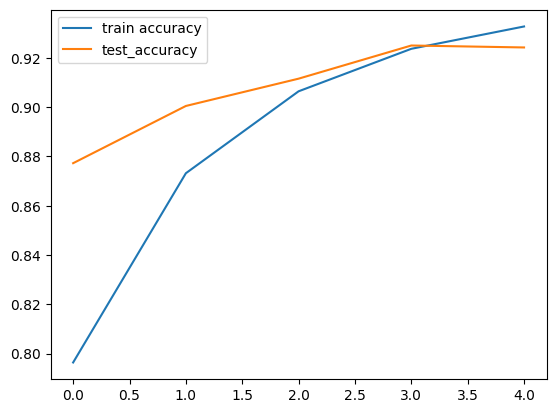

In [47]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

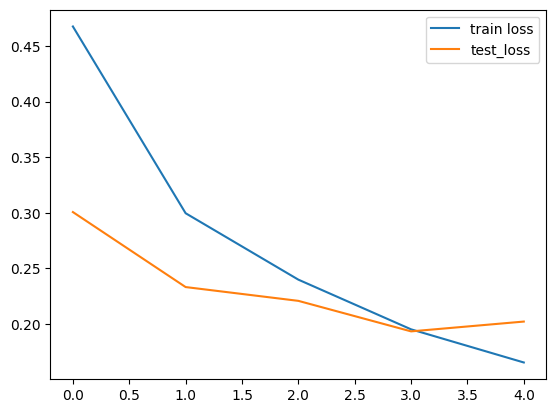

In [48]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [49]:
import cv2
import numpy as np

def predict_with_class(model, image_path, class_names):
    try:
        # Load the image
        image = cv2.imread(image_path)
        
        if image is None:
            raise FileNotFoundError("Failed to load image. Please check the file path.")
        
        image = cv2.resize(image, (100, 100))  
        
        predictions = model.predict(np.expand_dims(image, axis=0))
        
        percentage_predictions = predictions * 100
        
        formatted_percentages = ["{:.2f}%".format(p) for p in percentage_predictions[0]]
              
        predicted_class_index = np.argmax(predictions)      
       
        predicted_class_name = class_names[predicted_class_index]
        
        return predicted_class_name, formatted_percentages
    
    except Exception as e:
        return f"Error: {e}"


In [51]:
class_names = ['COVID', 'Normal', 'Viral Pneumonia', ...]  
predicted_class, percentages = predict_with_class(model, 'COVID-19_Radiography_Dataset\Viral Pneumonia\images\Viral Pneumonia-990.png', class_names)
print("Predicted class:", predicted_class)
print("Percentage probabilities:", percentages)

1/1 [==============================] - 0s 162ms/step
Predicted class: Viral Pneumonia
Percentage probabilities: ['0.00%', '0.00%', '100.00%']
